In [1]:
# import dependencies
import numpy as np
np.random.seed(0)  
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn. model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('../data/ohe_data.csv',index_col = False)

In [3]:
# display first 5 rows
df.head(2)

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,2016-02-08 00:37:08,40.10891,-83.09286,42.1,58.0,29.76,10.0,10.4,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2016-02-08 05:56:20,39.86542,-84.06280,36.9,91.0,29.68,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# drop columns deemed uncessary.
df.drop(columns = ['Unnamed: 0','Start_Time','Start_Lat','Start_Lng'],axis = 1,inplace = True)

In [5]:
# columns to encode
cat_columns = ['Sunrise_Sunset', 'Amenity','Bump','Crossing','Give_Way','Junction',
              'No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Sunrise_Sunset']

In [6]:
#Converting all Non-Numerical Columns to Numerical
'''The code below creates a label encoder object for each of the categorical columns in the dataset. 
It then transforms the values in those columns using the label encoder objects.'''

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        df[col] = globals()['LE_{}'.format(col)].fit_transform(df[col])
df.head()   

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,42.1,58.0,29.76,10.0,10.4,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,36.9,91.0,29.68,10.0,0.0,0.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,36.0,97.0,29.70,10.0,0.0,0.02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,39.0,55.0,29.65,10.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,37.0,93.0,29.69,10.0,10.4,0.01,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# train, test split
X= df.drop('Severity', axis =1 )
y = df['Severity']
# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30,stratify = y, random_state=42)

In [8]:
# check the baseline
y.value_counts(normalize = True)

0    0.900065
1    0.099935
Name: Severity, dtype: float64

### Balancing dataset


#### MinMax scale where datapoints fall between 0 and 1.

In [9]:
# scaling all features
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [10]:
# adding samples to minority class using SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [11]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    90.00646
1     9.99354
Name: Severity, dtype: float64

In [12]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Severity, dtype: float64

### Machine Learning Model after Balancing

In [13]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  82.5252869058645 %

Confusion matrix :
[[602197 135240]
 [122490 614947]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82    737437
           1       0.82      0.83      0.83    737437

    accuracy                           0.83   1474874
   macro avg       0.83      0.83      0.83   1474874
weighted avg       0.83      0.83      0.83   1474874



In [14]:
# Decision Tree classification

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = decision_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Decision Tree Model Accuracy :  87.6369100004475 %

Confusion matrix :
[[619776 117661]
 [ 64679 672758]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87    737437
           1       0.85      0.91      0.88    737437

    accuracy                           0.88   1474874
   macro avg       0.88      0.88      0.88   1474874
weighted avg       0.88      0.88      0.88   1474874



### Using random sample since it is difficult to process the whole dataset.

In [15]:
df_sample = df.sample(n=1000000)

In [16]:
df_sample.shape

(1000000, 130)

In [17]:
# train, test split
X= df_sample.drop('Severity', axis =1 )
y = df_sample['Severity']
# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30,stratify = y, random_state=42)

In [18]:
# scaling all features
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
x_train_scaled = pd.DataFrame(MMS.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(MMS.transform(X_test), columns=X_test.columns)

In [19]:
# adding samples to minority class using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train_scaled, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test_scaled, y_test)

In [20]:
# Original majority and minority class
y_train.value_counts(normalize=True)*100

0    89.989143
1    10.010857
Name: Severity, dtype: float64

In [21]:
# after using SMOTE 
y_train_oversam.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: Severity, dtype: float64

In [22]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression(max_iter = 40,solver= 'liblinear')
log_model.fit(x_train_oversam, y_train_oversam)

print('Logistic Model Accuracy : ', log_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = log_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Logistic Model Accuracy :  82.70035707935756 %

Confusion matrix :
[[221145  48823]
 [ 44584 225384]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83    269968
           1       0.82      0.83      0.83    269968

    accuracy                           0.83    539936
   macro avg       0.83      0.83      0.83    539936
weighted avg       0.83      0.83      0.83    539936



**Findings**
- The Logistic Model Accuracy is 82.81122057673853%.

- The confusion matrix shows that 220589 out of 269897 accidents were correctly predicted to be non-severe, while 43476 out of 269897 accidents were incorrectly predicted to be non-severe. Similarly, 226421 out of 269897 accidents were correctly predicted to be severe, while 49308 out of 269897 accidents were incorrectly predicted to be severe.  
     - precision: of those who were predicted to have a accident severity of 0, 84% actually had the severity of 0.  
     - recall: of those who actually had a accident severity of 0, 82% were predicted severity of 0. 

In [23]:
# Random Forest classification


RandomForest_model = RandomForestClassifier(n_estimators=100,
                                            max_depth=4,
                                            min_samples_leaf=6)

RandomForest_model.fit(x_train_oversam, y_train_oversam)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = RandomForest_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

Random Forest Model Accuracy :  82.20214988443074 %

Confusion matrix :
[[207286  62682]
 [ 33415 236553]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81    269968
           1       0.79      0.88      0.83    269968

    accuracy                           0.82    539936
   macro avg       0.83      0.82      0.82    539936
weighted avg       0.83      0.82      0.82    539936



**Findings**
- The model accuracy is 81.83%. This means that the model correctly predicts the severity of an accident 81.83% of the time.
- The confusion matrix shows that the model correctly predicts that an accident is not severe (severity = 0) 210743 times and correctly predicts that an accident is severe (severity = 1) 230987 times. The model also incorrectly predicts that an accident is not severe 59154 times and incorrectly predicts that an accident is severe 38910 times.
     - precision: of those who were predicted to have a accident severity of 1, 80% actually had the severity of 1.  
     - recall: of those who actually had a accident severity of 1, 86% were predicted severity of 1. 

In [24]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(x_train_oversam, y_train_oversam)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test_oversam, y_test_oversam)*100, '%')

prediction = XGB_model.predict(x_test_oversam)
print('\nConfusion matrix :')
print(confusion_matrix(y_test_oversam, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))

XGBoost Model Accuracy :  95.0870103123333 %

Confusion matrix :
[[261661   8307]
 [ 18220 251748]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    269968
           1       0.97      0.93      0.95    269968

    accuracy                           0.95    539936
   macro avg       0.95      0.95      0.95    539936
weighted avg       0.95      0.95      0.95    539936



**Findings**
- The model accuracy is 95.10%. The model is able to correctly predict the severity of an accident 95.10% of the time.
- The confusion matrix shows that the model correctly predicted 260809 (97%) of accidents with a severity of 0 and 252557 (94%) of accidents with a severity of 1.
     - precision: of those who were predicted to have a accident severity of 1, 97% actually had the severity of 1.  
     - recall: of those who actually had a accident severity of 1, 97% were predicted severity of 1. 

### Comparing Recall vs Accuracy Trade-off of Logistic Regression and XG Boost:

In [25]:
v_list = np.linspace(0,1,100)
xg_sensitivity_list = []
lr_sensitivity_list = []
xg_accuracy_list = []
lr_accuracy_list = []

for v in v_list:
    y_pred_lr = (log_model.predict_proba(x_test_scaled)[:,1] >= v).astype(bool)
    lr_sensitivity = recall_score(y_test, y_pred_lr)
    lr_sensitivity_list.append(lr_sensitivity)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    lr_accuracy_list.append(lr_accuracy)

for v in v_list:
    y_pred_xg = (XGB_model.predict_proba(x_test_scaled)[:,1] >= v).astype(bool)
    xg_sensitivity = recall_score(y_test, y_pred_xg)
    xg_sensitivity_list.append(xg_sensitivity)
    xg_accuracy = accuracy_score(y_test, y_pred_xg)
    xg_accuracy_list.append(xg_accuracy)


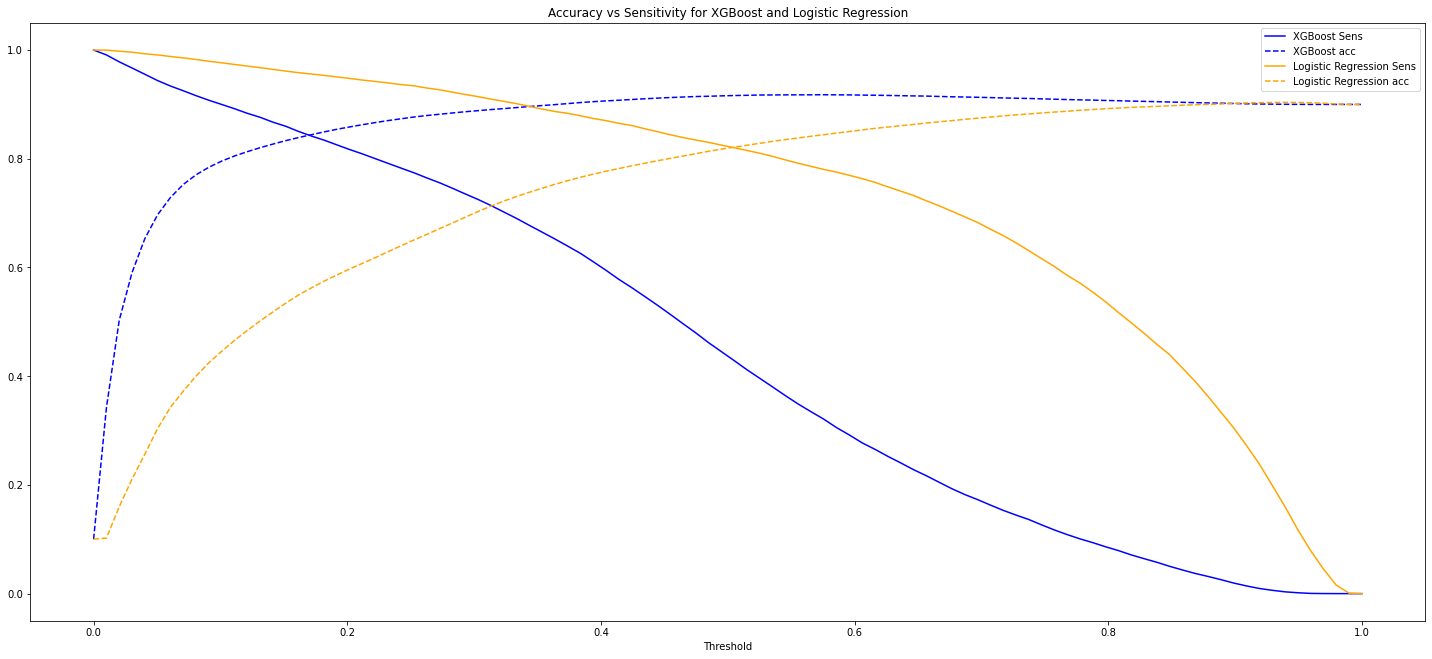

In [35]:
plt.figure(figsize=(25,11))
plt.plot(v_list, xg_sensitivity_list,'b-', label='XGBoost Sens')
plt.plot(v_list, xg_accuracy_list,'b--', label='XGBoost acc')
plt.plot(v_list, lr_sensitivity_list,'-', color='orange', label='Logistic Regression Sens')
plt.plot(v_list, lr_accuracy_list,'--',color='orange', label='Logistic Regression acc')
plt.xlabel('Threshold')
plt.legend()
plt.title('Accuracy vs Sensitivity for XGBoost and Logistic Regression')
plt.savefig('../images/acc_sens.png') 
plt.show()

In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
@interact
def plot(Threshold=(0.0, 1.0, 0.001)):
    sns.heatmap(confusion_matrix(y_test, (XGB_model.predict_proba(x_test_scaled)[:,1] >= Threshold).astype(bool), normalize='true'), annot=True)

interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.001), Output()), _dom_cl…

<AxesSubplot:>

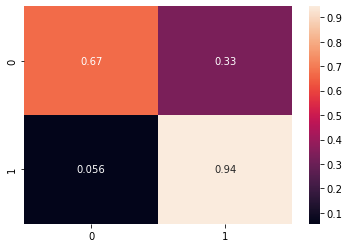

In [28]:
sns.heatmap(confusion_matrix(y_test, (XGB_model.predict_proba(x_test_scaled)[:,1] >= .05).astype(bool), normalize='true'), annot=True)

In [29]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
@interact
def plot(Threshold=(0.0, 1.0, 0.001)):
    sns.heatmap(confusion_matrix(y_test, (log_model.predict_proba(x_test_scaled)[:,1] >= Threshold).astype(bool), normalize='true'), annot=True)

interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.001), Output()), _dom_cl…

<AxesSubplot:>

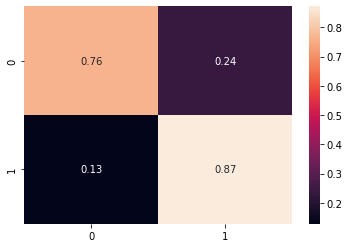

In [30]:
sns.heatmap(confusion_matrix(y_test, (log_model.predict_proba(x_test_scaled)[:,1] >= .4).astype(bool), normalize='true'), annot=True)

XGBoost has slightly higher accuracy than Logistic Regression when recall is equal between the models. This means that our XGBoost model is better at predicting severity overall when optimizing for recall. |

#### XGBoost gave the highest accuracy and best recall of all the models created.

### Feature Importance

In [31]:
'''fit an XGBoost classifier to the training data and compute the feature importances
Only get top 14 importance 
'''
model = XGBClassifier()
model.fit(x_train_oversam, y_train_oversam)
importances = pd.DataFrame(data={
    'Attribute': x_train_oversam.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances =importances.head(14)

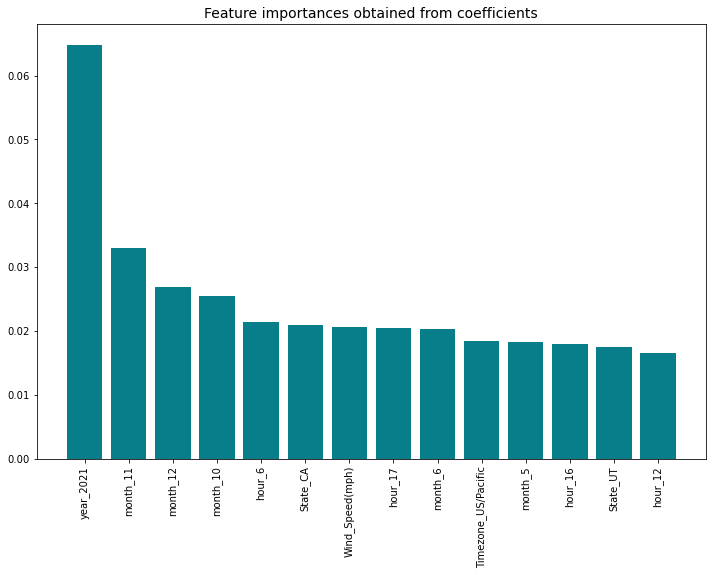

In [36]:
# create a bar chart that shows the feature importances obtained from the coefficients of the linear regression model
plt.figure(figsize=(12,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=14)
plt.xticks(rotation='vertical')
plt.savefig('../images/feat_importance.png') 
plt.show()

The feature importance of our model shows that its more likely for a servere accident to happen in the winter vs other times of the year. Accidents happening at 6am and 5pm appear to have higher chances of being servere as well. Accidents on the west coast also appear to be more servere. Wind speed also appears to be a significant feature in our model. The year 2021 appearing as the most important feature in our model may have to do with the imbalance of data between years. 

**References**:
- https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155